In [1]:
import python_inventory as pyinv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

In [2]:
X, Y = load_iris(return_X_y=True)

In [3]:
print(X.shape)

(150, 4)


In [4]:
YB = label_binarize(Y, classes=np.arange(3))

In [5]:
YB1 = 2.0 * YB[:,2] - 1.0
YB1

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [6]:
m = 20
body = pyinv.NN()

models = []
for j in range(m):
    mod = pyinv.SigmaNeuronModel(pyinv.RELU(), 4)
    models.append(mod)
layer = pyinv.FuncLayer(models)
body.add(layer)

print(body.n_param)

head = pyinv.LinearModel(m)

print(head.n_param)

nn = pyinv.ModelNN(head, body)

nn.init_param()

100
21


In [7]:
loss_func = pyinv.ErrorLoss(pyinv.Square())
am = pyinv.ArithMean()
risk = pyinv.Risk(nn, loss_func, am)

gd = pyinv.GradientDescent(risk, h=0.1, n_iter=100, tol=1.0e-9)

77


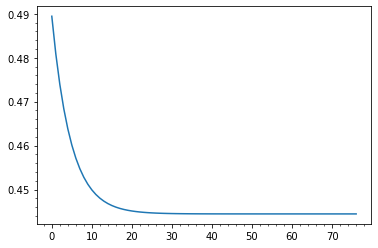

In [8]:
gd.fit(X, YB1)
print(gd.K)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [9]:
YB1_p = np.sign(nn.evaluate_all(X))

In [10]:
nn.evaluate_all(X)

array([-0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33323344,
       -0.33323344, -0.33323344, -0.33323344, -0.33323344, -0.33

In [11]:
print(sum(YB1_p == 1.))
print(sum(YB1_p != 1.))

0
150
